#**Pouya Shaeri**
#**400422105**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the dataset from Kaggle

In [5]:
!pip install kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"pouyashaeri","key":"b80538d07a0739db1eece5366aafd3f9"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!ls

 apartment-rental-offers-in-germany.zip  'kaggle (1).json'   sample_data
 files					  kaggle.json


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
df_original = pd.read_csv('/content/files/immo_data.csv')

# **Task 1: Delete or Impute Missing Data**

In [11]:
df_original

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0       ONE_YEAR_FREE                       NaN       False    False   
1       ONE_YEAR_FREE                       NaN       False     True   
2       ONE_YEAR_FREE                      10.0        True     True   
3       ONE_YEAR_FREE                       NaN       False     True   
4                 NaN                       NaN       False     True   
...               ...                       ...         ...      ...   
268845  ONE_YEAR_FREE                       NaN       False     True   
268846            NaN                       NaN       False     True   
268847  ONE_YEAR_FREE                       NaN       False     True   
268848            NaN                       NaN        True     True   
268849            NaN                       NaN       False     True   

        picturecount  pricetrend  telekomUploadSpeed  ...  \
0                  6        4.62                10.0  ...   
1                  8        3.47                10.0  ...   
2                  8        2.72                 2.4  ...   
3                  9        1.53                40.0  ...   
4                 19        2.46                 NaN  ...   
...              ...         ...                 ...  ...   
268845             0        2.74                10.0  ...   
268846            12        6.49                 NaN  ...   
268847            21        2.90                40.0  ...   
268848            16        4.39                 NaN  ...   
268849             9        5.00                 NaN  ...   

                         regio2                      regio3  \
0                      Dortmund                     Schüren   
1             Rhein_Pfalz_Kreis              Böhl_Iggelheim   
2                       Dresden  Äußere_Neustadt_Antonstadt   
3           Mittelsachsen_Kreis                    Freiberg   
4                        Bremen           Neu_Schwachhausen   
...                         ...                         ...   
268845  Weilheim_Schongau_Kreis                    Eberfing   
268846         Bergstraße_Kreis                   Viernheim   
268847   Limburg_Weilburg_Kreis         Limburg_an_der_Lahn   
268848                     Köln                   Dellbrück   
268849        Frankfurt_am_Main                  Sossenheim   

                                              description  \
0       Die ebenerdig zu erreichende Erdgeschosswohnun...   
1       Alles neu macht der Mai – so kann es auch für ...   
2       Der Neubau entsteht im Herzen der Dresdner Neu...   
3       Abseits von Lärm und Abgasen in Ihre neue Wohn...   
4       Es handelt sich hier um ein saniertes Mehrfami...   
...                                                   ...   
268845  Diese schöne, neuwertige Wohnung im Dachgescho...   
268846  Hier wird eine Wohnung im 2 Familienhaus angeb...   
268847  gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...   
268848  Neubau Erstbezug, gehobener Standard, alle Ein...   
268849  Schöne, helle, gut geschnittene und teilmöblie... 

In [12]:
pd.options.display.max_columns = 999
df_original.head(10)

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   
5   Schleswig_Holstein         142.00                     gas_heating   
6              Sachsen          70.00  self_contained_central_heating   
7               Bremen          88.00                 central_heating   
8    Baden_Württemberg         110.00                     oil_heating   
9  Nordrhein_Westfalen          95.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   
5           NONE                       NaN       False     True             5   
6  ONE_YEAR_FREE                      10.0       False    False             9   
7  ONE_YEAR_FREE                      10.0       False     True             5   
8  ONE_YEAR_FREE                       NaN       False    False             5   
9  ONE_YEAR_FREE                       NaN       False    False             7   

   pricetrend  telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0        4.62                10.0     840.00           1965.0   96107057   
1        3.47                10.0        NaN           1871.0  111378734   
2        2.72                 2.4    1300.00           2019.0  113147523   
3        1.53                40.0        NaN           1964.0  108890903   
4        2.46                 NaN     903.00           1950.0  114751222   
5        4.48                 2.4        NaN           1999.0  115531145   
6        1.01                 2.4     380.00              NaN  114391930   
7        1.89                 2.4     584.25           1959.0  115270775   
8        3.77                40.0     690.00           1970.0  106416361   
9        1.92                40.0        NaN           1953.0   91383597   

   noParkSpaces       firingTypes  hasKitchen              geo_bln  cellar  \
0           1.0               oil       False  Nordrhein_Westfalen    True   
1           2.0               gas       False      Rheinland_Pfalz   False   
2           1.0               NaN       False              Sachsen    True   
3           NaN  district_heating       False              Sachsen   False   
4           NaN               gas       False               Bremen   False   
5           NaN               gas        True   Schleswig_Holstein   False   
6           NaN               NaN       False              Sachsen    True   
7           NaN   gas:electricity       False               Bremen    True   
8           1.0               oil        True    Baden_Württemberg    True   
9           NaN               gas       False  Nordrhein_Westfalen    True   

   yearConstructedRange  baseRent houseNumber  livingSpace  \
0                   2.0    595.00         244        86.00   
1                   1.0    800.00         NaN        89.00   
2                   9.0    965.00           4        83.80   
3                   2.0    343.00          35        58.15   
4                   1.0    765.00          10        84.97   
5                   5.0    315.20          1e        53.43   
6                   NaN    310.00          14        62.00   
7                   2.0    452.25          35        60.30   
8                   2.0    580.00         NaN        53.00   
9   

In [13]:
df = df_original

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [15]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

Z-SCORE

In [16]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

**Chizayi k 0 Boodanesh Mohem Hast ro Barresi Mikonam**

In [17]:
len(df[df['livingSpace'] == 0])

67

In [18]:
len(df[df['baseRent'] == 0])

79

In [19]:
len(df[df['yearConstructed'] == 0])

0

In [20]:
len(df[df['geo_plz'] == 0])

0

Chon saale Sakht ('yearConstructed') age 0 bashe Miangin roosh Bad mishe.

In [21]:
len(df[df['totalRent'] == 0])

223

vali totalRento 0 hasho am null dar nazar migiram k ba Formul/Model Poresh konam 

**Duplicated Handling**

In [22]:
df = df.drop(df[df['livingSpace'] == 0].index)
df = df.drop(df[df['baseRent'] == 0].index)

In [23]:
duplicatedMask = df.duplicated(subset=['regio1', 'regio2', 'regio3','geo_plz', 'geo_krs', 
                      'livingSpace', 'baseRent', 'newlyConst', 'cellar', 'hasKitchen', 
                      'balcony', 'garden', 'lift', 'noRooms'], keep=False)
len(duplicatedMask)

247640

In [24]:
df = df[duplicatedMask == False]

In [25]:
df.shape

(222150, 49)

Mikham Sotunayi k Bishtaraz 50% eshon Nulle Drop Konam

In [26]:
df.columns[df.isna().sum()/len(df) > 0.50]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

vali fln ghabzaye ***Electricity*** va ***Heating*** ro mikhameshon , baraye hamin negaheshon midaram

hatta age ba mean Por konim ya harchi baz baraye mohasebate Dakhele Model **Reliable Nis**.

**pas ghablaz Model zadan too Taske Akhar Drop Mishan**.

In [27]:
df = df.drop(columns = ['telekomHybridUploadSpeed', 'noParkSpaces', 'energyEfficiencyClass', 'lastRefurbish'])
df.shape

(222150, 45)

Sotun Hayi k mikham Drop She (Numerical):

**'houseNumber' : Chon null dare , Chejori masalan Poresh konam ???**


Range ha:
**'yearConstructedRange', 'baseRentRange', 'noRoomsRange', 'livingSpaceRange'** 


In [28]:
columns = ['houseNumber', 'yearConstructedRange', 'baseRentRange',
           'noRoomsRange', 'livingSpaceRange']

In [29]:
df = df.drop(columns = columns)

In [30]:
df.shape

(222150, 40)

Sotun hayi k mikham Drop She (Categorical):

'Onayi k bishtar az 16 ta hastan'

Discription ha k Almani Neveshte:
**'description', 'facilities'**

'geo_bln' Chon tekrare Regio 1

boodan naboodane 'date' ba 4 ta done che Tasiri dare

In [31]:
df_cat = df.select_dtypes(exclude=["number"])
df_cat.nunique()

regio1                16
heatingType           13
telekomTvOffer         3
newlyConst             2
balcony                2
firingTypes          127
hasKitchen             2
geo_bln               16
cellar                 2
geo_krs              419
condition             10
interiorQual           4
petsAllowed            3
street             48016
streetPlain        49676
lift                   2
typeOfFlat            10
garden                 2
regio2               419
regio3              8331
description       183472
facilities        161127
date                   4
dtype: int64

In [32]:
columns = ['firingTypes', 'geo_krs', 'geo_bln', 'street',
           'streetPlain', 'streetPlain', 'regio2', 
           'regio3', 'description', 'facilities']

In [33]:
df = df.drop(columns = columns)

In [34]:
df.shape

(222150, 31)

**Berim Soraghe Total Rent k Targetemone**

In [35]:
df.totalRent.isna().sum()

33464

In [36]:
df.totalRent.isna().sum()/len(df)

0.15063695701102858

In [37]:
df.totalRent.fillna(0, inplace = True)

In [38]:
(df.totalRent == 0).sum()

33647

totalRent 40517 ta Missing dare yani 15% !!! ino Chejori Por konim ?

\begin{equation*}
total\ rent = base\ rent + N_1\times ghabze\ electricityo\ heating\ ina + N_2\times service\ charge
\end{equation*}

inaro migiram Noise dar ($N_1$ , $N_2$) ba Ham Jam mikonam

In [39]:
df.baseRent.isna().sum()

0

Ghabza inas: `['electricityBasePrice' , 'electricityKwhPrice' , 'heatingCosts']`




In [40]:
df.electricityBasePrice.isna().sum()/len(df)

0.8390546927751519

In [41]:
df.electricityKwhPrice.isna().sum()/len(df)

0.8390546927751519

In [42]:
df.heatingCosts.isna().sum()/len(df)

0.7011883862255233

In [43]:
df.electricityBasePrice.fillna(df.electricityBasePrice.mean(), inplace = True)
df.electricityKwhPrice.fillna(df.electricityKwhPrice.mean(), inplace = True)
df.heatingCosts.fillna(df.heatingCosts.mean(), inplace = True)

In [44]:
df.serviceCharge.isna().sum()

5999

In [45]:
df.serviceCharge.isna().sum()/len(df)

0.027004276389826692

In [46]:
df.serviceCharge.fillna(df.serviceCharge.mean(), inplace = True)

In [ ]:
# df.sort_values(by = 'totalRent', inplace = True)

In [47]:
df_tr0 = df[df['totalRent'] == 0]

In [48]:
noise1 = np.abs(np.random.randn(1))
noise2 = np.abs(np.random.randn(1))

In [49]:
df_tr0['baseRent']+noise1 *(df_tr0['electricityBasePrice'] + df_tr0['electricityKwhPrice'] + df_tr0['heatingCosts'])+ noise2 * df_tr0['serviceCharge']

1          999.974994
3          528.862442
5          517.935515
9          486.517449
18         527.031171
             ...     
268796     515.144080
268817     739.650604
268823     805.496037
268833     488.242775
268849    1197.431802
Length: 33647, dtype: float64

In [50]:
df_tr0['totalRent'] = df_tr0['baseRent'] + noise1 * (df_tr0['electricityBasePrice'] +
                                                     df_tr0['electricityKwhPrice'] + 
                                                     df_tr0['heatingCosts']) + noise2 * df_tr0['serviceCharge']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df_tr0

regio1  serviceCharge                     heatingType  \
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
3                   Sachsen          58.15                district_heating   
5        Schleswig_Holstein         142.00                     gas_heating   
9       Nordrhein_Westfalen          95.00  self_contained_central_heating   
18      Nordrhein_Westfalen         121.00                 central_heating   
...                     ...            ...                             ...   
268796              Sachsen         120.00                 central_heating   
268817               Hessen         220.00                     gas_heating   
268823  Nordrhein_Westfalen         150.00                 central_heating   
268833              Sachsen         100.00                             NaN   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
1       ONE_YEAR_FREE       False     True             8        3.47   
3       ONE_YEAR_FREE       False     True             9        1.53   
5                NONE       False     True             5        4.48   
9       ONE_YEAR_FREE       False    False             7        1.92   
18      ONE_YEAR_FREE       False     True             5        3.12   
...               ...         ...      ...           ...         ...   
268796  ONE_YEAR_FREE       False    False             5        3.42   
268817            NaN       False     True            19        3.62   
268823  ONE_YEAR_FREE       False     True             4        2.82   
268833  ONE_YEAR_FREE       False    False            11        2.10   
268849            NaN       False     True             9        5.00   

        telekomUploadSpeed    totalRent  yearConstructed    scoutId  \
1                     10.0   999.974994           1871.0  111378734   
3                     40.0   528.862442           1964.0  108890903   
5                      2.4   517.935515           1999.0  115531145   
9                     40.0   486.517449           1953.0   91383597   
18                    40.0   527.031171           1914.0  111227157   
...                    ...          ...              ...        ...   
268796                40.0   515.144080           1899.0  114020473   
268817                 NaN   739.650604           1991.0  113480233   
268823                40.0   805.496037           1980.0   75973047   
268833                40.0   488.242775           1873.0  114637314   
268849                 NaN  1197.431802           1972.0  115524054   

        hasKitchen  cellar  baseRent  livingSpace    condition   interiorQual  \
1            False   False     800.0        89.00  refurbished         normal   
3            False   False     343.0        58.15          NaN            NaN   
5             True   False     315.2        53.43    well_kept            NaN   
9            False    True     300.0        60.00    well_kept         normal   
18           False    True     329.0        65.00    well_kept            NaN   
...            ...     ...       ...          ...          ...            ...   
268796       False    True     320.0        49.00    well_kept         normal   
268817       False    True     510.0       102.00    well_kept         normal   
268823        True   False     600.0        50.00    well_kept  sophisticated   
268833       False   False     300.0       102.00  refurbished            NaN   
268849        True    True     935.0        77.00   modernized            NaN   

       petsAllowed   lift    typeOfFlat  geo_plz  noRooms  thermalChar  floor  \
1               no  False  ground_floor    67459      3.0          NaN    NaN   
3              NaN  False         other     9599      3.0         86.0    3.0   
5               no  False     apartment    24891      2.0        165.0    NaN   
9       negotiable  False     apartment    45888      2.5        207.

In [52]:
df_tr0['totalRent']

1          999.974994
3          528.862442
5          517.935515
9          486.517449
18         527.031171
             ...     
268796     515.144080
268817     739.650604
268823     805.496037
268833     488.242775
268849    1197.431802
Name: totalRent, Length: 33647, dtype: float64

In [53]:
df_trna0 = df[df['totalRent'] != 0]
df_trna0

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen          245.0                 central_heating   
2                   Sachsen          255.0                   floor_heating   
4                    Bremen          138.0  self_contained_central_heating   
6                   Sachsen           70.0  self_contained_central_heating   
7                    Bremen           88.0                 central_heating   
...                     ...            ...                             ...   
268843              Sachsen          120.0                 central_heating   
268844  Nordrhein_Westfalen           80.0                     gas_heating   
268845               Bayern           90.0                       heat_pump   
268846               Hessen          220.0                     gas_heating   
268848  Nordrhein_Westfalen          175.0                       heat_pump   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
2       ONE_YEAR_FREE        True     True             8        2.72   
4                 NaN       False     True            19        2.46   
6       ONE_YEAR_FREE       False    False             9        1.01   
7       ONE_YEAR_FREE       False     True             5        1.89   
...               ...         ...      ...           ...         ...   
268843  ONE_YEAR_FREE       False     True            12        2.00   
268844  ONE_YEAR_FREE       False    False            12        2.58   
268845  ONE_YEAR_FREE       False     True             0        2.74   
268846            NaN       False     True            12        6.49   
268848            NaN        True     True            16        4.39   

        telekomUploadSpeed  totalRent  yearConstructed    scoutId  hasKitchen  \
0                     10.0     840.00           1965.0   96107057       False   
2                      2.4    1300.00           2019.0  113147523       False   
4                      NaN     903.00           1950.0  114751222       False   
6                      2.4     380.00              NaN  114391930       False   
7                      2.4     584.25           1959.0  115270775       False   
...                    ...        ...              ...        ...         ...   
268843                40.0     368.00           1930.0   91110231       False   
268844                 2.4     670.00              NaN  115526313       False   
268845                10.0     910.00           2016.0  115641081       False   
268846                 NaN    1150.00           1983.0   96981497        True   
268848                 NaN    1015.00           2019.0  110938302       False   

        cellar  baseRent  livingSpace                           condition  \
0         True    595.00        86.00                           well_kept   
2         True    965.00        83.80                      first_time_use   
4        False    765.00        84.97                         refurbished   
6         True    310.00        62.00                     fully_renovated   
7         True    452.25        60.30                                 NaN   
...        ...       ...          ...                                 ...   
268843    True    248.00        55.00                          negotiable   
268844   False    590.00        85.00  first_time_use_after_refurbishment   
268845    True    820.00        90.00                      mint_condition   
268846   False    930.00       115.00                           well_kept   
268848    True    840.00        70.00                      first_time_use   

         interiorQual petsAllowed   lift    typeOfFlat  geo_plz  noRooms  \
0              normal         NaN  False  ground_floor    44269      4.0   
2       sophisticated         NaN   True     apartment     1097      3.0   
4                 NaN         NaN  False     apartment    28213      3.0   
6                

In [56]:
df = pd.concat([df_tr0 , df_trna0])
df

regio1  serviceCharge                     heatingType  \
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
3                   Sachsen          58.15                district_heating   
5        Schleswig_Holstein         142.00                     gas_heating   
9       Nordrhein_Westfalen          95.00  self_contained_central_heating   
18      Nordrhein_Westfalen         121.00                 central_heating   
...                     ...            ...                             ...   
268843              Sachsen         120.00                 central_heating   
268844  Nordrhein_Westfalen          80.00                     gas_heating   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
1       ONE_YEAR_FREE       False     True             8        3.47   
3       ONE_YEAR_FREE       False     True             9        1.53   
5                NONE       False     True             5        4.48   
9       ONE_YEAR_FREE       False    False             7        1.92   
18      ONE_YEAR_FREE       False     True             5        3.12   
...               ...         ...      ...           ...         ...   
268843  ONE_YEAR_FREE       False     True            12        2.00   
268844  ONE_YEAR_FREE       False    False            12        2.58   
268845  ONE_YEAR_FREE       False     True             0        2.74   
268846            NaN       False     True            12        6.49   
268848            NaN        True     True            16        4.39   

        telekomUploadSpeed    totalRent  yearConstructed    scoutId  \
1                     10.0   999.974994           1871.0  111378734   
3                     40.0   528.862442           1964.0  108890903   
5                      2.4   517.935515           1999.0  115531145   
9                     40.0   486.517449           1953.0   91383597   
18                    40.0   527.031171           1914.0  111227157   
...                    ...          ...              ...        ...   
268843                40.0   368.000000           1930.0   91110231   
268844                 2.4   670.000000              NaN  115526313   
268845                10.0   910.000000           2016.0  115641081   
268846                 NaN  1150.000000           1983.0   96981497   
268848                 NaN  1015.000000           2019.0  110938302   

        hasKitchen  cellar  baseRent  livingSpace  \
1            False   False     800.0        89.00   
3            False   False     343.0        58.15   
5             True   False     315.2        53.43   
9            False    True     300.0        60.00   
18           False    True     329.0        65.00   
...            ...     ...       ...          ...   
268843       False    True     248.0        55.00   
268844       False   False     590.0        85.00   
268845       False    True     820.0        90.00   
268846        True   False     930.0       115.00   
268848       False    True     840.0        70.00   

                                 condition   interiorQual petsAllowed   lift  \
1                              refurbished         normal          no  False   
3                                      NaN            NaN         NaN  False   
5                                well_kept            NaN          no  False   
9                                well_kept         normal  negotiable  False   
18                               well_kept            NaN  negotiable  False   
...                                    ...            ...         ...    ...   
268843                          negotiable         simple  negotiable  False   
268844  first_time_use_after_refurbishment  sophisticated  negotiable  False   
268845   

In [57]:
(df.totalRent == 0).sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222150 entries, 1 to 268848
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                222150 non-null  object 
 1   serviceCharge         222150 non-null  float64
 2   heatingType           184792 non-null  object 
 3   telekomTvOffer        195295 non-null  object 
 4   newlyConst            222150 non-null  bool   
 5   balcony               222150 non-null  bool   
 6   picturecount          222150 non-null  int64  
 7   pricetrend            220565 non-null  float64
 8   telekomUploadSpeed    194727 non-null  float64
 9   totalRent             222150 non-null  float64
 10  yearConstructed       173304 non-null  float64
 11  scoutId               222150 non-null  int64  
 12  hasKitchen            222150 non-null  bool   
 13  cellar                222150 non-null  bool   
 14  baseRent              222150 non-null  float64
 15  

null haye Baghi mande Adadi ra miangin begirim

In [59]:
df.fillna(df._get_numeric_data().mean(),inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222150 entries, 1 to 268848
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                222150 non-null  object 
 1   serviceCharge         222150 non-null  float64
 2   heatingType           184792 non-null  object 
 3   telekomTvOffer        195295 non-null  object 
 4   newlyConst            222150 non-null  bool   
 5   balcony               222150 non-null  bool   
 6   picturecount          222150 non-null  int64  
 7   pricetrend            222150 non-null  float64
 8   telekomUploadSpeed    222150 non-null  float64
 9   totalRent             222150 non-null  float64
 10  yearConstructed       222150 non-null  float64
 11  scoutId               222150 non-null  int64  
 12  hasKitchen            222150 non-null  bool   
 13  cellar                222150 non-null  bool   
 14  baseRent              222150 non-null  float64
 15  

Categoricala null hasho ba mode por konim

In [60]:
df.isna().sum()

regio1                      0
serviceCharge               0
heatingType             37358
telekomTvOffer          26855
newlyConst                  0
balcony                     0
picturecount                0
pricetrend                  0
telekomUploadSpeed          0
totalRent                   0
yearConstructed             0
scoutId                     0
hasKitchen                  0
cellar                      0
baseRent                    0
livingSpace                 0
condition               57285
interiorQual            92952
petsAllowed             94685
lift                        0
typeOfFlat              29050
geo_plz                     0
noRooms                     0
thermalChar                 0
floor                       0
numberOfFloors              0
garden                      0
heatingCosts                0
electricityBasePrice        0
electricityKwhPrice         0
date                        0
dtype: int64

In [61]:
for column in df.columns:
  if df[column].dtype == 'bool' or df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)

In [62]:
df.isna().sum().sum()

0

# **-----------LEARN AND IMPUTE TOTAL RENT---------------**

In [ ]:
dff = df_original

In [ ]:
dff

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0       ONE_YEAR_FREE                       NaN       False    False   
1       ONE_YEAR_FREE                       NaN       False     True   
2       ONE_YEAR_FREE                      10.0        True     True   
3       ONE_YEAR_FREE                       NaN       False     True   
4                 NaN                       NaN       False     True   
...               ...                       ...         ...      ...   
268845  ONE_YEAR_FREE                       NaN       False     True   
268846            NaN                       NaN       False     True   
268847  ONE_YEAR_FREE                       NaN       False     True   
268848            NaN                       NaN        True     True   
268849            NaN                       NaN       False     True   

        picturecount  pricetrend  telekomUploadSpeed  ...  \
0                  6        4.62                10.0  ...   
1                  8        3.47                10.0  ...   
2                  8        2.72                 2.4  ...   
3                  9        1.53                40.0  ...   
4                 19        2.46                 NaN  ...   
...              ...         ...                 ...  ...   
268845             0        2.74                10.0  ...   
268846            12        6.49                 NaN  ...   
268847            21        2.90                40.0  ...   
268848            16        4.39                 NaN  ...   
268849             9        5.00                 NaN  ...   

                         regio2                      regio3  \
0                      Dortmund                     Schüren   
1             Rhein_Pfalz_Kreis              Böhl_Iggelheim   
2                       Dresden  Äußere_Neustadt_Antonstadt   
3           Mittelsachsen_Kreis                    Freiberg   
4                        Bremen           Neu_Schwachhausen   
...                         ...                         ...   
268845  Weilheim_Schongau_Kreis                    Eberfing   
268846         Bergstraße_Kreis                   Viernheim   
268847   Limburg_Weilburg_Kreis         Limburg_an_der_Lahn   
268848                     Köln                   Dellbrück   
268849        Frankfurt_am_Main                  Sossenheim   

                                              description  \
0       Die ebenerdig zu erreichende Erdgeschosswohnun...   
1       Alles neu macht der Mai – so kann es auch für ...   
2       Der Neubau entsteht im Herzen der Dresdner Neu...   
3       Abseits von Lärm und Abgasen in Ihre neue Wohn...   
4       Es handelt sich hier um ein saniertes Mehrfami...   
...                                                   ...   
268845  Diese schöne, neuwertige Wohnung im Dachgescho...   
268846  Hier wird eine Wohnung im 2 Familienhaus angeb...   
268847  gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...   
268848  Neubau Erstbezug, gehobener Standard, alle Ein...   
268849  Schöne, helle, gut geschnittene und teilmöblie... 

In [ ]:
dff.totalRent.isna().sum()

40517

In [ ]:
dff.totalRent.fillna(0, inplace = True)

In [ ]:
dff.fillna(dff._get_numeric_data().mean(), inplace = True)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             268850 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  268850 non-null  float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                268850 non-null  float64
 9   telekomUploadSpeed        268850 non-null  float64
 10  totalRent                 268850 non-null  float64
 11  yearConstructed           268850 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              268850 non-null  f

In [ ]:
dff = dff.select_dtypes(include=["number"])
dff

serviceCharge  telekomHybridUploadSpeed  picturecount  pricetrend  \
0              245.00                      10.0             6        4.62   
1              134.00                      10.0             8        3.47   
2              255.00                      10.0             8        2.72   
3               58.15                      10.0             9        1.53   
4              138.00                      10.0            19        2.46   
...               ...                       ...           ...         ...   
268845          90.00                      10.0             0        2.74   
268846         220.00                      10.0            12        6.49   
268847         220.00                      10.0            21        2.90   
268848         175.00                      10.0            16        4.39   
268849         315.00                      10.0             9        5.00   

        telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0                10.000000      840.0           1965.0   96107057   
1                10.000000        0.0           1871.0  111378734   
2                 2.400000     1300.0           2019.0  113147523   
3                40.000000        0.0           1964.0  108890903   
4                28.804928      903.0           1950.0  114751222   
...                    ...        ...              ...        ...   
268845           10.000000      910.0           2016.0  115641081   
268846           28.804928     1150.0           1983.0   96981497   
268847           40.000000      930.0           1965.0   66924271   
268848           28.804928     1015.0           2019.0  110938302   
268849           28.804928        0.0           1972.0  115524054   

        noParkSpaces  yearConstructedRange  ...  noRooms  thermalChar  \
0           1.000000                   2.0  ...      4.0   181.400000   
1           2.000000                   1.0  ...      3.0   114.749533   
2           1.000000                   9.0  ...      3.0   114.749533   
3           1.327634                   2.0  ...      3.0    86.000000   
4           1.327634                   1.0  ...      3.0   188.900000   
...              ...                   ...  ...      ...          ...   
268845      1.000000                   9.0  ...      3.0   114.749533   
268846      1.000000                   4.0  ...      3.5   114.749533   
268847      1.000000                   2.0  ...      4.0   160.770000   
268848      1.000000                   9.0  ...      2.0    24.700000   
268849      1.000000                   3.0  ...      3.0   114.749533   

           floor  numberOfFloors  noRoomsRange  livingSpaceRange  \
0       1.000000        3.000000             4                 4   
1       2.122405        3.572319             3                 4   
2       3.000000        4.000000             3                 4   
3       3.000000        3.572319             3                 2   
4       1.000000        3.572319             3                 4   
...          ...             ...           ...               ...   
268845  2.122405        3.572319             3                 4   
268846  1.000000        1.000000             3                 5   
268847  1.000000        2.000000             4                 4   
268848  2.122405        5.000000             2                 3   
268849  2.122405       13.000000             3                 3   

        heatingCosts  lastRefurbish  electricityBasePrice  electricityKwhPrice  
0          76.990866    2013.904536             89.113612             0.199769  
1          76.990866    2019.000000             89.113612             0.199769  
2          76.990866    2013.904536             89.113612             0.199769  
3          87.230000    2013.904536             89.113612             0.199769  
4          76.990866    2013.904536             89.113612             0.199769  
...              ...            ...                   ...                 

In [ ]:
dff.isna().sum().sum()

0

In [ ]:
dff = dff.sort_values(by = 'totalRent')

ZSCORE

In [ ]:
for cols in dff.columns:
    if dff[cols].dtype == 'int64' or dff[cols].dtype == 'float64':
        upper_range = dff[cols].mean() + 3 * dff[cols].std()
        lower_range = dff[cols].mean() - 3 * dff[cols].std()
        
        indexs = dff[(dff[cols] > upper_range) | (dff[cols] < lower_range)].index
        dff = dff.drop(indexs)

NORMALIZE

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dff_train = dff[dff.totalRent != 0]
x_train = dff_train.drop(columns = ['totalRent'])
y_train = dff_train['totalRent']
dff_test = dff[dff.totalRent == 0]
x_test = dff_test.drop(columns = ['totalRent'])
y_test = dff_test['totalRent']

In [ ]:
len(x_test)/len(dff)

0.15086261176174284

In [ ]:
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test  = std_scale.transform(x_test)

In [ ]:
y_test

268849    0.0
69364     0.0
69372     0.0
69373     0.0
69376     0.0
         ... 
4651      0.0
15394     0.0
262570    0.0
15308     0.0
20326     0.0
Name: totalRent, Length: 34742, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
len(y_test)

34742

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)
y_predicted = regr.predict(x_test)
y_test = y_predicted
y_test

array([1241.6101, 1591.5063,  942.8214, ...,  602.59  ,  590.1344,
       1403.1204])

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predicted = reg.predict(x_test)
y_test = y_predicted
y_test

array([1259.12230428, 1581.02914557,  925.26977845, ...,  631.2914662 ,
        619.46203177, 1402.72771309])

# **-----------------------------------------------------------------**

# **TASK 2: Describe and Visualize Data**

In [63]:
df.describe()

serviceCharge   picturecount     pricetrend  telekomUploadSpeed  \
count  222150.000000  222150.000000  222150.000000       222150.000000   
mean      151.603037       9.488359       3.403889           28.950167   
std        82.008870       5.631068       1.848005           15.141342   
min         0.000000       0.000000      -2.500000            1.000000   
25%       100.000000       6.000000       2.090000           10.000000   
50%       140.000000       9.000000       3.420000           40.000000   
75%       190.000000      13.000000       4.580000           40.000000   
max      1070.000000      29.000000       9.260000           40.000000   

           totalRent  yearConstructed       scoutId       baseRent  \
count  222150.000000    222150.000000  2.221500e+05  222150.000000   
mean      830.557807      1968.060529  1.085010e+08     654.292344   
std       581.299837        34.178406  8.891495e+06     498.197013   
min         1.000000      1827.000000  6.942902e+07       1.000000   
25%       490.000000      1958.000000  1.069432e+08     349.000000   
50%       674.650302      1968.060529  1.112610e+08     500.000000   
75%      1000.000000      1993.000000  1.138052e+08     800.000000   
max     64651.000000      2090.000000  1.157117e+08   39200.000000   

         livingSpace        geo_plz        noRooms    thermalChar  \
count  222150.000000  222150.000000  222150.000000  222150.000000   
mean       73.825075   38709.216516       2.629089     113.095951   
std        31.453223   27864.132214       0.976165      37.943437   
min         1.000000     852.000000       1.000000       0.100000   
25%        54.250000    9224.000000       2.000000      99.000000   
50%        68.000000   39288.000000       3.000000     113.095951   
75%        87.740000   58566.000000       3.000000     116.700000   
max       649.000000   99998.000000      10.000000     299.700000   

               floor  numberOfFloors   heatingCosts  electricityBasePrice  \
count  222150.000000   222150.000000  222150.000000          2.221500e+05   
mean        2.022535        3.428309      74.267994          9.076000e+01   
std         1.355464        1.390981      19.552402          1.731249e-10   
min        -1.000000        0.000000       0.000000          9.076000e+01   
25%         1.000000        3.000000      74.267994          9.076000e+01   
50%         2.000000        3.428309      74.267994          9.076000e+01   
75%         3.000000        4.000000      74.267994          9.076000e+01   
max        12.000000       22.000000     455.000000          9.076000e+01   

       electricityKwhPrice  
count        222150.000000  
mean              0.197828  
std               0.002953  
min               0.177500  
25%               0.197828  
50%               0.197828  
75%               0.197828  
max               0.219500

In [64]:
cols = []
for cols in df.columns:
  if df[cols].dtype == 'bool' or df[cols].dtype == 'object':
    print(df[cols].describe())
    print('-----------------------')

count                  222150
unique                     16
top       Nordrhein_Westfalen
freq                    54215
Name: regio1, dtype: object
-----------------------
count              222150
unique                 13
top       central_heating
freq               141982
Name: heatingType, dtype: object
-----------------------
count            222150
unique                3
top       ONE_YEAR_FREE
freq             215095
Name: telekomTvOffer, dtype: object
-----------------------
count     222150
unique         2
top        False
freq      204469
Name: newlyConst, dtype: object
-----------------------
count     222150
unique         2
top         True
freq      136638
Name: balcony, dtype: object
-----------------------
count     222150
unique         2
top        False
freq      143892
Name: hasKitchen, dtype: object
-----------------------
count     222150
unique         2
top         True
freq      142053
Name: cellar, dtype: object
-----------------------
count        222150
un

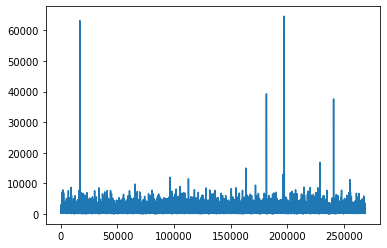

In [ ]:
df.totalRent.plot()

Chera Bazi Vaghta Outlier Baghi mimone ba Vojode in K Z-Score Zadim ???? **❗**(STACKOVERFLOW ANSWER)**❗**

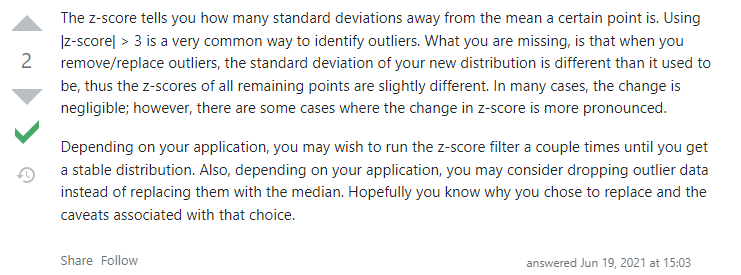

In [ ]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

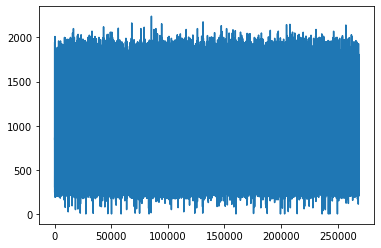

In [ ]:
df.totalRent.plot()

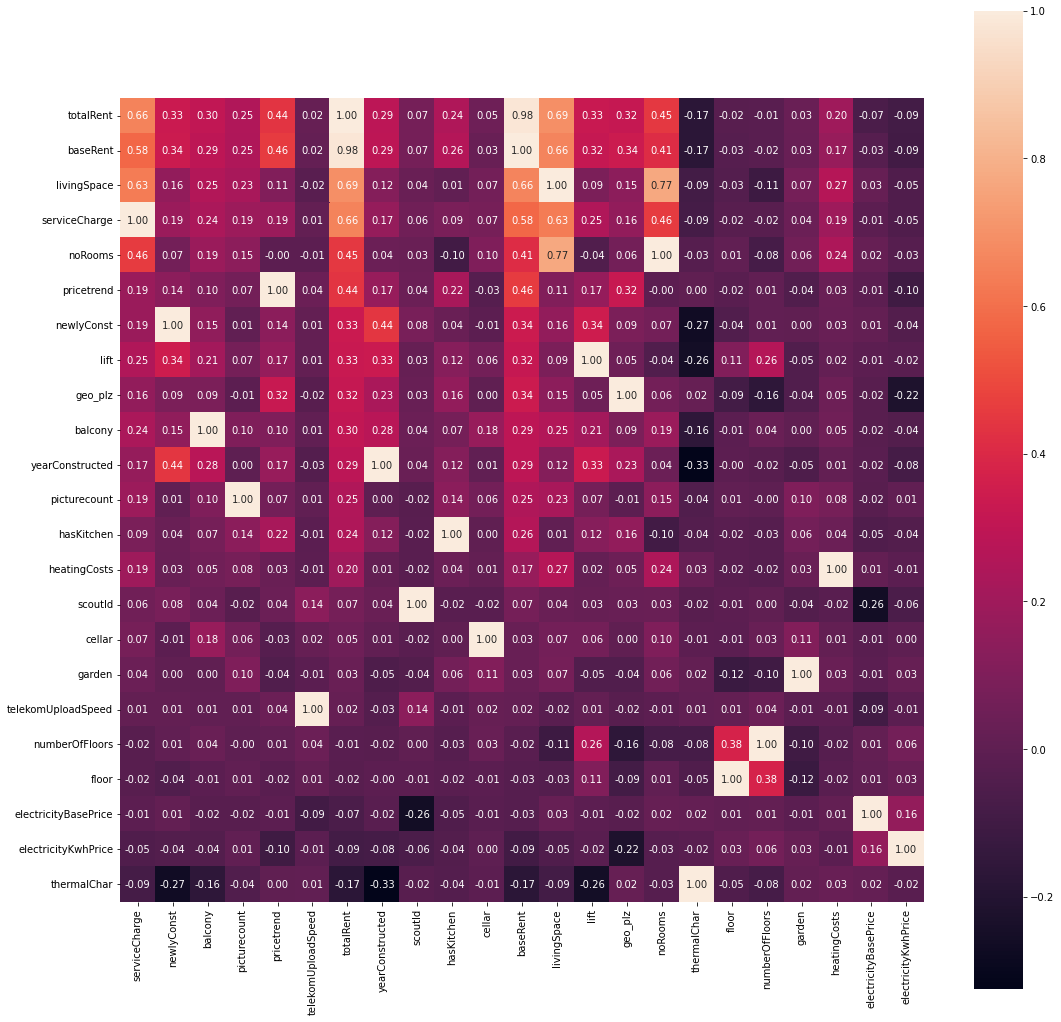

In [ ]:
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(df.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True)

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='totalRent', y='baseRent')
fig.show()

In [ ]:
fig = px.scatter(df, x='baseRent', y='livingSpace')
fig.show()

In [ ]:
from plotly.offline import init_notebook_mode, iplot

In [ ]:
rentmean = df.groupby(['regio1'])['totalRent'].mean().sort_index()

fig = px.histogram(x = df['regio1'].value_counts().sort_index().index,
                   y = rentmean,
                   color= df['regio1'].value_counts().sort_index().index
             )
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

In [ ]:
countpie = df['newlyConst'].value_counts()
countpie = countpie.sort_index() 
fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": ['False','True'],
      "domain": {"x": [0, .5]},
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of the residence is newly constructed or not",
    }
}
iplot(fig)

In [ ]:
countpie = df['heatingType'].value_counts()

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "City",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of all the City ratio in the dataset",
    }
}
iplot(fig)

# **TASK 3: Model**

Categoricala Ro Numeric mikonim

In [65]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        columns.append(cols)

columns

['regio1',
 'heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'cellar',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat',
 'garden',
 'date']

In [66]:
dummies_feature = pd.get_dummies(df[columns])

df = pd.concat([df, dummies_feature], axis=1)

In [67]:
df.drop(columns = columns , inplace = True)

Ghablaz Normalize hatman Soton haye : 'scoutId', 'geo_plz', 'heatingCosts', 'electricityBasePrice',
       'electricityKwhPrice' hazf shavad

In [ ]:
df.drop(columns = ['scoutId', 'geo_plz', 'heatingCosts', 'electricityBasePrice', 'electricityKwhPrice'], inplace = True)

In [ ]:
df.shape

(186149, 75)

In [ ]:
y = df['totalRent']
x = df.drop(columns = ['totalRent'])

print(x.shape)
print(y.shape)

(186149, 74)
(186149,)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df2 = df.copy()

In [ ]:
y = df2['totalRent']
x = df2.drop(columns = ['totalRent'])

print(x.shape)
print(y.shape)

(186149, 74)
(186149,)


In [ ]:
df2

serviceCharge  picturecount  pricetrend  telekomUploadSpeed  \
1              134.00             8        3.47           10.000000   
3               58.15             9        1.53           40.000000   
5              142.00             5        4.48            2.400000   
9               95.00             7        1.92           40.000000   
18             121.00             5        3.12           40.000000   
...               ...           ...         ...                 ...   
268843         120.00            12        2.00           40.000000   
268844          80.00            12        2.58            2.400000   
268845          90.00             0        2.74           10.000000   
268846         220.00            12        6.49           28.950167   
268848         175.00            16        4.39           28.950167   

          totalRent  yearConstructed  baseRent  livingSpace  noRooms  \
1        857.197837      1871.000000     800.0        89.00      3.0   
3        399.577888      1964.000000     343.0        58.15      3.0   
5        372.870926      1999.000000     315.2        53.43      2.0   
9        354.891528      1953.000000     300.0        60.00      2.5   
18       386.243805      1914.000000     329.0        65.00      2.5   
...             ...              ...       ...          ...      ...   
268843   368.000000      1930.000000     248.0        55.00      2.0   
268844   670.000000      1968.060529     590.0        85.00      3.0   
268845   910.000000      2016.000000     820.0        90.00      3.0   
268846  1150.000000      1983.000000     930.0       115.00      3.5   
268848  1015.000000      2019.000000     840.0        70.00      2.0   

        thermalChar     floor  numberOfFloors  regio1_Baden_Württemberg  \
1        113.095951  2.022535        3.428309                         0   
3         86.000000  3.000000        3.428309                         0   
5        165.000000  2.022535        3.428309                         0   
9        207.700000  2.000000        5.000000                         0   
18       191.300000  2.000000        4.000000                         0   
...             ...       ...             ...                       ...   
268843   129.000000  1.000000        4.000000                         0   
268844   113.095951  3.000000        3.000000                         0   
268845   113.095951  2.022535        3.428309                         0   
268846   113.095951  1.000000        1.000000                         0   
268848    24.700000  2.022535        5.000000                         0   

        regio1_Bayern  regio1_Berlin  regio1_Brandenburg  regio1_Bremen  \
1                   0              0                   0              0   
3                   0              0                   0              0   
5                   0              0                   0              0   
9                   0              0                   0              0   
18                  0              0                   0              0   
...               ...            ...                 ...            ...   
268843              0              0                   0              0   
268844              0              0                   0              0   
268845              1              0                   0              0   
268846              0              0                   0              0   
268848              0              0                   0              0   

        regio1_Hamburg  regio1_Hessen  regio1_Mecklenburg_Vorpommern  \
1                    0              0                              0   
3                    0              0                              0   
5                    0              0                              0   
9                    0              0                              0   
18                   0              0                              0   
...                ...            ...                   

In [ ]:
pca = PCA(n_components = 20)
x_pca = pca.fit_transform(x)
x_pca.shape

(186149, 20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2,train_size=0.8)

In [ ]:
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test  = std_scale.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

reg_score = reg.score(x_test, y_test)
print(reg_score)

0.9761101877317029


In [ ]:
y_predicted = reg.predict(x_test)
yTestDF = pd.DataFrame()
yTestDF['totalRentPredicted'] = pd.DataFrame(y_predicted)
yTestDF

totalRentPredicted
0              928.056360
1              797.879991
2              384.243978
3              479.329241
4              402.076215
...                   ...
37225         1500.093603
37226          729.272317
37227          389.489513
37228          406.864811
37229          558.771696

[37230 rows x 1 columns]

# **TASK 4: Multiprocessing in Data Process and Runtime**

In [18]:
import time

In [109]:
df = df_original
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0       ONE_YEAR_FREE                       NaN       False    False   
1       ONE_YEAR_FREE                       NaN       False     True   
2       ONE_YEAR_FREE                      10.0        True     True   
3       ONE_YEAR_FREE                       NaN       False     True   
4                 NaN                       NaN       False     True   
...               ...                       ...         ...      ...   
268845  ONE_YEAR_FREE                       NaN       False     True   
268846            NaN                       NaN       False     True   
268847  ONE_YEAR_FREE                       NaN       False     True   
268848            NaN                       NaN        True     True   
268849            NaN                       NaN       False     True   

        picturecount  pricetrend  telekomUploadSpeed  totalRent  \
0                  6        4.62                10.0      840.0   
1                  8        3.47                10.0        NaN   
2                  8        2.72                 2.4     1300.0   
3                  9        1.53                40.0        NaN   
4                 19        2.46                 NaN      903.0   
...              ...         ...                 ...        ...   
268845             0        2.74                10.0      910.0   
268846            12        6.49                 NaN     1150.0   
268847            21        2.90                40.0      930.0   
268848            16        4.39                 NaN     1015.0   
268849             9        5.00                 NaN        NaN   

        yearConstructed    scoutId  noParkSpaces       firingTypes  \
0                1965.0   96107057           1.0               oil   
1                1871.0  111378734           2.0               gas   
2                2019.0  113147523           1.0               NaN   
3                1964.0  108890903           NaN  district_heating   
4                1950.0  114751222           NaN               gas   
...                 ...        ...           ...               ...   
268845           2016.0  115641081           1.0        geothermal   
268846           1983.0   96981497           1.0               gas   
268847           1965.0   66924271           1.0               gas   
268848           2019.0  110938302           1.0               gas   
268849           1972.0  115524054           1.0  district_heating   

        hasKitchen              geo_bln  cellar  yearConstructedRange  \
0            False  Nordrhein_Westfalen    True                   2.0   
1            False      Rheinland_Pfalz   False                   1.0   
2            False              Sachsen    True                   9.0   
3            False              Sachsen   False                   2.0   
4            False               Bremen   False                   1.0   
...            ...                  ...     ...                   ...   
268845       False               Bayern    True               

df o reset kardam k Mikham multiprocess konam , anjam bedam az aval yeseri kara ro.

⭐ **HADAF:** Man mikham Z-Score Outlier Detection ro ba multiprocess anjam bedam va runtime hasho moghayese konam



In [65]:
from multiprocessing import Pool, cpu_count

In [66]:
cpu_count()

2

**Z-Score**

In [112]:
df.shape

(268850, 49)

In [113]:
s_time = time.time()
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)
print(f'runtime : {time.time() - s_time}')

runtime : 2.6160495281219482


In [131]:
df.shape

(268850, 49)

In [132]:
df = df_original
df.shape

(268850, 49)

In [133]:
def myzscore(col, df = df):
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    upper_range = df[col].mean() + 3 * df[col].std()
    lower_range = df[col].mean() - 3 * df[col].std()

    indexs = df[(df[col] > upper_range) | (df[col] < lower_range)].index
    df = df.drop(indexs)
    return df

In [137]:
s_time = time.time()
with Pool(cpu_count()) as p:
  
  df_list = p.imap(myzscore, df.columns)

print(f'runtime : {time.time() - s_time}')

runtime : 0.6206409931182861


# **TASK 5: Pyspark and Dask and Runtime**

in seri fill kardane Null ha ra dar nazar migirim

In [11]:
!python -m pip install "dask[complete]"

In [12]:
import dask
import dask.dataframe as dd

In [41]:
df = df_original

In [42]:
df.shape

(268850, 49)

In [43]:
ddf = dd.from_pandas(df, npartitions = 4)

In [44]:
ddf.partitions[0]

Dask DataFrame Structure:
               regio1 serviceCharge heatingType telekomTvOffer telekomHybridUploadSpeed newlyConst balcony picturecount pricetrend telekomUploadSpeed totalRent yearConstructed scoutId noParkSpaces firingTypes hasKitchen geo_bln cellar yearConstructedRange baseRent houseNumber livingSpace geo_krs condition interiorQual petsAllowed  street streetPlain  lift baseRentRange typeOfFlat geo_plz  noRooms thermalChar    floor numberOfFloors noRoomsRange garden livingSpaceRange  regio2  regio3 description facilities heatingCosts energyEfficiencyClass lastRefurbish electricityBasePrice electricityKwhPrice    date
npartitions=1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0              object       float64      object         object                  float64       bool    bool        int64    float64            float64   float64         float64   int64      float64      object       bool  object   bool              float64  float64      object     float64  object    object       object      object  object      object  bool         int64     object   int64  float64     float64  float64        float64        int64   bool            int64  object  object      object     object      float64                object       float64              float64             float64  object
67213             ...           ...         ...            ...                      ...        ...     ...          ...        ...                ...       ...             ...     ...          ...         ...        ...     ...    ...                  ...      ...         ...         ...     ...       ...          ...         ...     ...         ...   ...           ...        ...     ...      ...         ...      ...            ...          ...    ...              ...     ...     ...         ...        ...          ...                   ...           ...                  ...                 ...     ...
Dask Name: blocks, 5 tasks

In [45]:
ddf.partitions[1]

Dask DataFrame Structure:
               regio1 serviceCharge heatingType telekomTvOffer telekomHybridUploadSpeed newlyConst balcony picturecount pricetrend telekomUploadSpeed totalRent yearConstructed scoutId noParkSpaces firingTypes hasKitchen geo_bln cellar yearConstructedRange baseRent houseNumber livingSpace geo_krs condition interiorQual petsAllowed  street streetPlain  lift baseRentRange typeOfFlat geo_plz  noRooms thermalChar    floor numberOfFloors noRoomsRange garden livingSpaceRange  regio2  regio3 description facilities heatingCosts energyEfficiencyClass lastRefurbish electricityBasePrice electricityKwhPrice    date
npartitions=1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
67213          object       float64      object         object                  float64       bool    bool        int64    float64            float64   float64         float64   int64      float64      object       bool  object   bool              float64  float64      object     float64  object    object       object      object  object      object  bool         int64     object   int64  float64     float64  float64        float64        int64   bool            int64  object  object      object     object      float64                object       float64              float64             float64  object
134426            ...           ...         ...            ...                      ...        ...     ...          ...        ...                ...       ...             ...     ...          ...         ...        ...     ...    ...                  ...      ...         ...         ...     ...       ...          ...         ...     ...         ...   ...           ...        ...     ...      ...         ...      ...            ...          ...    ...              ...     ...     ...         ...        ...          ...                   ...           ...                  ...                 ...     ...
Dask Name: blocks, 5 tasks

In [47]:
s_time = time.time()
df.fillna(df._get_numeric_data().mean(),inplace = True)
for column in df.columns:
  if df[column].dtype == 'bool' or df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)
print(f'runtime : {time.time() - s_time}')

runtime : 1.1033070087432861


In [48]:
df.shape

(239062, 49)

In [49]:
df = df_original
df.shape

(268850, 49)

In [50]:
gbos = df.groupby('regio1')

In [163]:
# for label, group in gbos:
#   print(f'label : {label}')
#   print(f'group :\n {group}')

In [51]:
ddf.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [58]:
s_time = time.time()
ddf.fillna(ddf._get_numeric_data().mean())
for column in ddf.columns:
  if ddf[column].dtype == 'bool' or ddf[column].dtype == 'object':
    ddf[column].fillna(ddf[column].mode()[0])
print(f'runtime : {time.time() - s_time}')

runtime : 0.1417064666748047


**Z-Score**

In [61]:
def myzscore(df):
  for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
      upper_range = df[col].mean() + 3 * df[col].std()
      lower_range = df[col].mean() - 3 * df[col].std()         
      indexs = df[(df[col] > upper_range) | (df[col] < lower_range)].index
      df.drop(indexs)

In [63]:
s_time = time.time()
myzscore(df)
print(f'Runtime: {time.time() - s_time}')

Runtime: 4.432937383651733


In [68]:
s_time = time.time()
with Pool(cpu_count()) as p:
  p.imap(myzscore, [ddf.partitions[0], ddf.partitions[1], ddf.partitions[2], 
                    ddf.partitions[3]])
print(f'Runtime: {time.time() - s_time}')

Runtime: 0.251492977142334
